In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch
import torch.nn as nn
import torch.optim as optim

In [2]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [3]:
import pandas as pd

# Load the data from a CSV file
df = pd.read_csv('../data/custom_preprocess_v2.csv')

In [4]:
df.head()

,amount,createdAt,recipient_accountNumber,recipient_full_name,sender_full_name,reviewed,reported,day,month,year,...,scaled_daily_tx_amount_of_recipient_accNumber,scaled_weekly_tx_amount_of_recipient,scaled_weekly_tx_amount_of_sender,scaled_weekly_tx_amount_of_recipient_accNumber,scaled_monthly_tx_amount_of_recipient,scaled_monthly_tx_amount_of_sender,scaled_monthly_tx_amount_of_recipient_accNumber,scaled_weekly_average_tx_amount_of_recipient,scaled_weekly_average_tx_amount_of_sender,scaled_weekly_average_tx_amount_of_recipient_accNumber
0,476.860,2023-09-14,3b681d83ccee97f33b3e,Stephen Small,Stephen Small,False,False,14,9,2023,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1,700.000,2023-09-14,22386743d148e118584d,Matthew Gilbert,Matthew Gilbert,False,False,14,9,2023,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2,30.000,2023-09-14,e2c2800b47b605016ee8,Peter Watkins,Peter Watkins,False,False,14,9,2023,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
3,550.000,2023-09-14,4937ff8c2964230a207d,Cindy Larson,Patricia Brown,False,False,14,9,2023,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
4,2285.250,2023-09-14,2d3d71ee832ada40ce63,Patricia Ford,Patricia Ford,False,False,14,9,2023,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.001,0.001,0.001


In [5]:
df.columns

Index(['amount', 'createdAt', 'recipient_accountNumber', 'recipient_full_name',
       'sender_full_name', 'reviewed', 'reported', 'day', 'month', 'year',
       'weekofyear', 'is_weekend', 'day_of_week', 'quarter',
       'daily_tx_count_of_recipient', 'daily_tx_count_of_sender',
       'daily_tx_count_of_recipient_accNumber', 'weekly_tx_count_of_recipient',
       'weekly_tx_count_of_sender', 'weekly_tx_count_of_recipient_accNumber',
       'monthly_tx_count_of_recipient', 'monthly_tx_count_of_sender',
       'monthly_tx_count_of_recipient_accNumber', 'log_amount',
       'scaled_amount', 'recipient_acc_per_recipient_name',
       'sender_per_recipient_name', 'weekly_tx_amount_of_recipient',
       'weekly_tx_amount_of_sender', 'weekly_tx_amount_of_recipient_accNumber',
       'monthly_tx_amount_of_recipient', 'monthly_tx_amount_of_sender',
       'monthly_tx_amount_of_recipient_accNumber',
       'daily_tx_amount_of_recipient', 'daily_tx_amount_of_sender',
       'daily_tx_amount_of

In [6]:
usable_columns = ['day', 'month', 'year', 'daily_tx_count_of_recipient', 'weekofyear', 'daily_tx_count_of_sender', 'daily_tx_count_of_recipient_accNumber',
       'weekly_tx_count_of_recipient', 'weekly_tx_count_of_sender', 'weekly_tx_count_of_recipient_accNumber','monthly_tx_count_of_recipient', 'monthly_tx_count_of_sender',
       'monthly_tx_count_of_recipient_accNumber', 'is_weekend', 'day_of_week', 'quarter', 'log_amount', 'scaled_amount', 'recipient_acc_per_recipient_name', 
       'sender_per_recipient_name', 'weekly_average_tx_count_of_recipient', 'weekly_average_tx_count_of_sender',
       'weekly_average_tx_count_of_recipient_accNumber','monthly_average_tx_count_of_recipient', 'monthly_average_tx_count_of_sender',
       'monthly_average_tx_count_of_recipient_accNumber', 'daily_average_tx_count_of_recipient','daily_average_tx_count_of_sender',
       'daily_average_tx_count_of_recipient_accNumber', 'scaled_daily_tx_amount_of_recipient', 'scaled_daily_tx_amount_of_sender',
       'scaled_daily_tx_amount_of_recipient_accNumber', 'scaled_weekly_tx_amount_of_recipient','scaled_weekly_tx_amount_of_sender',
       'scaled_weekly_tx_amount_of_recipient_accNumber', 'scaled_monthly_tx_amount_of_recipient', 'scaled_monthly_tx_amount_of_sender',
       'scaled_monthly_tx_amount_of_recipient_accNumber', 'scaled_weekly_average_tx_amount_of_recipient', 'scaled_weekly_average_tx_amount_of_sender',]
len(usable_columns)

40

In [7]:
import torch.nn as nn

class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()

        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(40, 20),  # Encode_1: 48 -> 24
            nn.Tanh(),
            nn.Linear(20, 10),  # Encode_2: 24 -> 12
            nn.ReLU(),
            nn.Linear(10, 5),  # Encode_3: 12 -> 6
            nn.ReLU()
        )
        
        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(5, 10),  # Decode_1: 6 -> 12
            nn.Tanh(),
            nn.Linear(10, 20),  # Decode_2: 12 -> 24
            nn.ReLU(),
            nn.Linear(20, 40),  # Decode_3: 24 -> 48
            nn.LeakyReLU()
        )
        
    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [8]:
from sklearn.model_selection import train_test_split

df.sort_values(by='createdAt', ascending=True)

# Time-based train-test split
train_size = int(len(df) * 0.75)

X = df[usable_columns]
y = df['reported']

train_data = df[usable_columns].iloc[:train_size]
test_data = df[usable_columns].iloc[train_size:]

train_labels = df['reported'].iloc[:train_size]
test_labels = df['reported'].iloc[train_size:]

# Filter training data to only include normal transactions
normal_train_data = train_data[train_labels == 0]  # Assuming 0 means normal

In [9]:
train_tensor = torch.tensor(normal_train_data.values, dtype=torch.float32)
test_tensor = torch.tensor(test_data.values, dtype=torch.float32)


batch_size = 200
train_dataset = torch.utils.data.TensorDataset(train_tensor)
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = torch.utils.data.TensorDataset(test_tensor)
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


lambda_reg = 1e-3

# Model initialization
model = Autoencoder()

# Choice of loss
loss_type = 'MSE'  # Choose between 'MSE' and 'BCE'
if loss_type == 'MSE':
    criterion = nn.MSELoss()  # Mean squared error loss
else:
    criterion = nn.BCEWithLogitsLoss()  # Binary cross-entropy loss. Use if you have a sigmoid activation in the output layer.

# Optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Early stopping setup
best_loss = float('inf')
patience = 10
epochs_without_improvement = 0

# Training loop with early stopping
num_epochs = 100

loss_values = []
test_loss_values = []
reconstruction_errors = []



for epoch in range(num_epochs):
    reconstruction_errors = []
    epoch_loss = 0.0
    for batch in train_dataloader:
        inputs = batch[0]

        # Zero the optimizer's gradient buffer
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)
        mse_loss = criterion(outputs, inputs)
        
        # 3. Activity Regularizer
        # Assuming the first layer of the encoder is model.encoder[0]
        activity_regularizer = lambda_reg * torch.norm(model.encoder[0](inputs), 1)
        
        # Combining the regularized loss
        total_loss = mse_loss + activity_regularizer

        # Backward pass and optimization
        total_loss.backward()
        optimizer.step()

        epoch_loss += total_loss.item()

    epoch_loss = epoch_loss / len(train_dataloader)

    # Save the loss value for plotting
    loss_values.append(epoch_loss)

    # Test the model
    model.eval()
    with torch.no_grad():
        test_loss = 0.0
        for batch in test_dataloader:
            inputs = batch[0]
            outputs = model(inputs)
            mse_loss = criterion(outputs, inputs)
            test_loss += mse_loss.item()

            batch_errors = torch.sum((outputs - inputs) ** 2, dim=1).numpy() # Sum of squared differences for each sample
            reconstruction_errors.extend(batch_errors)

        test_loss = test_loss / len(test_dataloader)
        test_loss_values.append(test_loss)

    model.train()

    print(f"Epoch [{epoch + 1}/{num_epochs}], Train Loss: {epoch_loss:.4f}, Test Loss: {test_loss:.4f}")


    # Early stopping check
    if epoch_loss + 1e-5 < best_loss:
        best_loss = epoch_loss
        epochs_without_improvement = 0
    else:
        epochs_without_improvement += 1

    if epochs_without_improvement == patience:
        print("Early stopping due to no improvement in loss.")
        break

Epoch [1/100], Train Loss: 101818.0925, Test Loss: 100521.2768
Epoch [2/100], Train Loss: 98415.4384, Test Loss: 95848.7030
Epoch [3/100], Train Loss: 92497.9699, Test Loss: 88765.5544
Epoch [4/100], Train Loss: 84510.3433, Test Loss: 79897.6950
Epoch [5/100], Train Loss: 75137.3588, Test Loss: 69895.0293
Epoch [6/100], Train Loss: 64779.9666, Test Loss: 59372.5403
Epoch [7/100], Train Loss: 54196.3010, Test Loss: 48878.7629
Epoch [8/100], Train Loss: 43889.7315, Test Loss: 38881.7056
Epoch [9/100], Train Loss: 34277.9155, Test Loss: 29758.6605
Epoch [10/100], Train Loss: 25693.8374, Test Loss: 21788.9164
Epoch [11/100], Train Loss: 18365.5992, Test Loss: 15148.6380
Epoch [12/100], Train Loss: 12415.1303, Test Loss: 9905.6820
Epoch [13/100], Train Loss: 7855.4055, Test Loss: 6019.8840
Epoch [14/100], Train Loss: 4591.3393, Test Loss: 3351.3684
Epoch [15/100], Train Loss: 2441.2750, Test Loss: 1681.6899
Epoch [16/100], Train Loss: 1161.0972, Test Loss: 748.4924
Epoch [17/100], Train Los

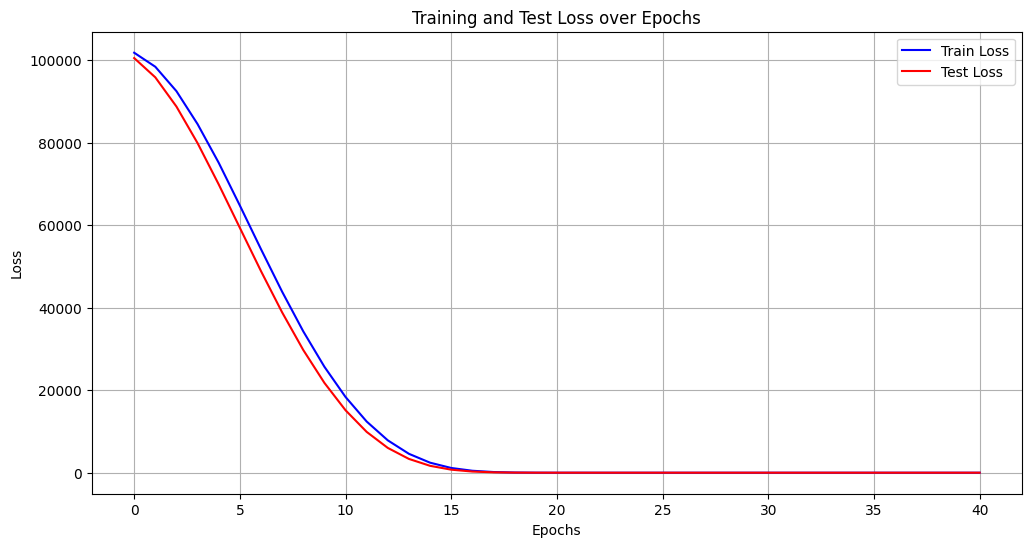

In [10]:
# Plotting the training and test losses
plt.figure(figsize=(12, 6))
plt.plot(loss_values, label="Train Loss", color="blue")
plt.plot(test_loss_values, label="Test Loss", color="red")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Test Loss over Epochs")
plt.legend()
plt.grid(True)
plt.show()

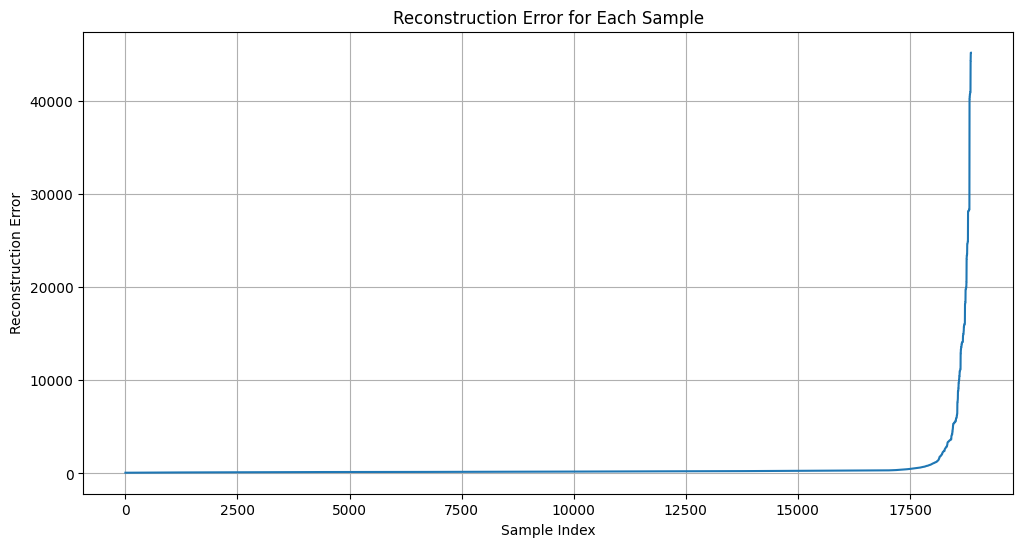

In [11]:
# sort and plot the reconstruction errors
reconstruction_errors.sort()
plt.figure(figsize=(12, 6))
plt.plot(reconstruction_errors)
plt.xlabel("Sample Index")
plt.ylabel("Reconstruction Error")
plt.title("Reconstruction Error for Each Sample")
plt.grid(True)

# Evaluations

In [12]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, roc_auc_score, confusion_matrix, precision_recall_curve, roc_curve

# Reconstruct the test data
with torch.no_grad():
    reconstructed_test = model(test_tensor).numpy()

In [26]:
test_data.shape

(18861, 40)

In [32]:
reconstruction_errors

56582     2.604
56583     6.117
56584     8.404
56585     3.421
56586   369.122
          ...  
75438     2.199
75439     3.886
75440     3.906
75441     2.056
75442     2.022
Length: 18861, dtype: float64

In [13]:
# Calculate reconstruction error
reconstruction_errors = np.mean(np.power(test_data - reconstructed_test, 2), axis=1)

# Choose a threshold based on domain knowledge, the distribution of reconstruction errors, or via a validation set.
threshold = np.percentile(reconstruction_errors, 98)  # e.g., 98th percentile as threshold. This is a naive approach; refine based on your needs.

# Convert reconstruction errors into binary labels (0 or 1)
predicted_labels = [1 if error > threshold else 0 for error in reconstruction_errors]

# Convert reconstruction errors into probabilities between 0 and 1
predicted_probabilities = (reconstruction_errors - min(reconstruction_errors)) / (max(reconstruction_errors) - min(reconstruction_errors))

# Assuming df has a 'reported' column with true labels
true_labels = df['reported'].loc[test_data.index].values

In [14]:
# Calculate metrics
f1 = f1_score(true_labels, predicted_labels)
precision = precision_score(true_labels, predicted_labels)
recall = recall_score(true_labels, predicted_labels)
accuracy = accuracy_score(true_labels, predicted_labels)
roc_auc = roc_auc_score(true_labels, predicted_probabilities)

# Calculate FPR
tn, fp, fn, tp = confusion_matrix(true_labels, predicted_labels).ravel()
fpr = fp / (fp + tn)

print(f'F1 Score: {f1:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'Accuracy: {accuracy:.4f}')
print(f'ROC AUC: {roc_auc:.4f}')
print(f'False Positive Rate (FPR): {fpr:.4f}')

F1 Score: 0.6508
Precision: 0.5423
Recall: 0.8135
Accuracy: 0.9883
ROC AUC: 0.9633
False Positive Rate (FPR): 0.0093


In [15]:
# Calculate metrics
f1 = f1_score(true_labels, predicted_labels)
precision = precision_score(true_labels, predicted_labels)
recall = recall_score(true_labels, predicted_labels)
accuracy = accuracy_score(true_labels, predicted_labels)
roc_auc = roc_auc_score(true_labels, predicted_probabilities)

# Calculate FPR
tn, fp, fn, tp = confusion_matrix(true_labels, predicted_labels).ravel()
fpr = fp / (fp + tn)

print(f'F1 Score: {f1:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'Accuracy: {accuracy:.4f}')
print(f'ROC AUC: {roc_auc:.4f}')
print(f'False Positive Rate (FPR): {fpr:.4f}')

F1 Score: 0.6508
Precision: 0.5423
Recall: 0.8135
Accuracy: 0.9883
ROC AUC: 0.9633
False Positive Rate (FPR): 0.0093


In [39]:
# heatmap of confusion matrix
import seaborn as sns
sns.set(font_scale=2)

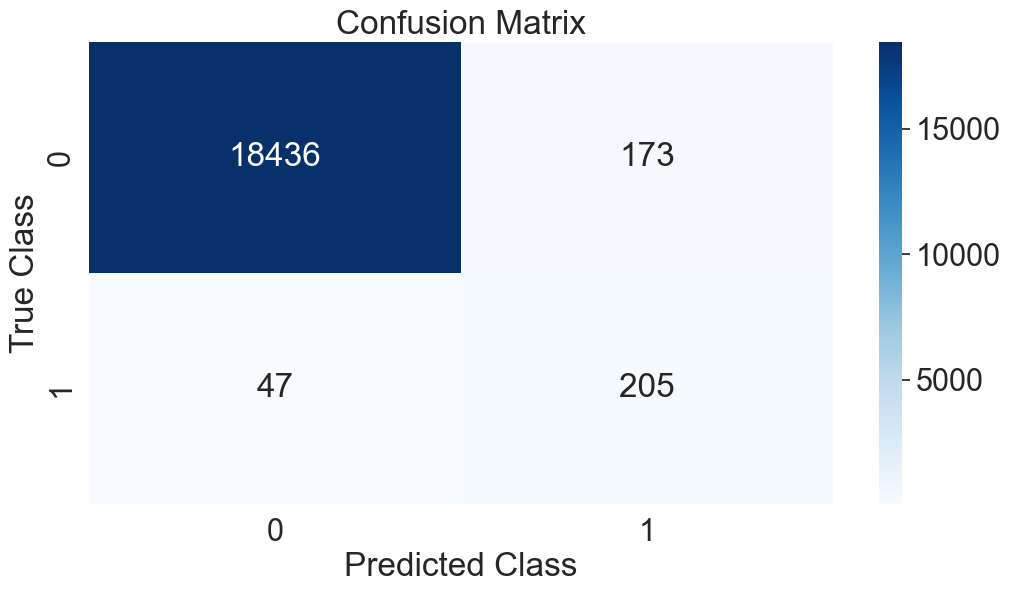

In [40]:
# heatmap of confusion matrix
import seaborn as sns

conf_matrix = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(12, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.savefig('../images/our_confusion_matrix.png')
plt.show()

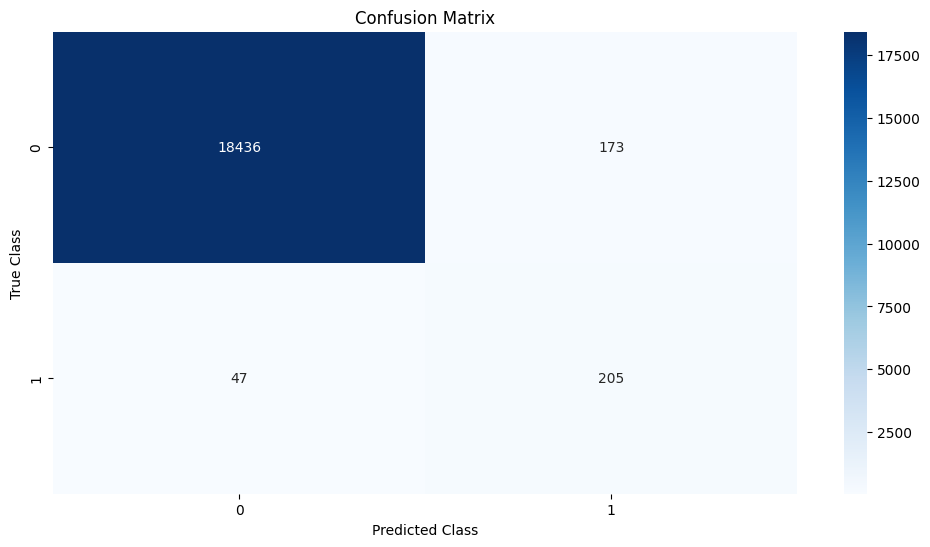

In [17]:
    # heatmap of confusion matrix
import seaborn as sns

conf_matrix = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(12, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.savefig('../images/our_confusion_matrix.png')
plt.show()

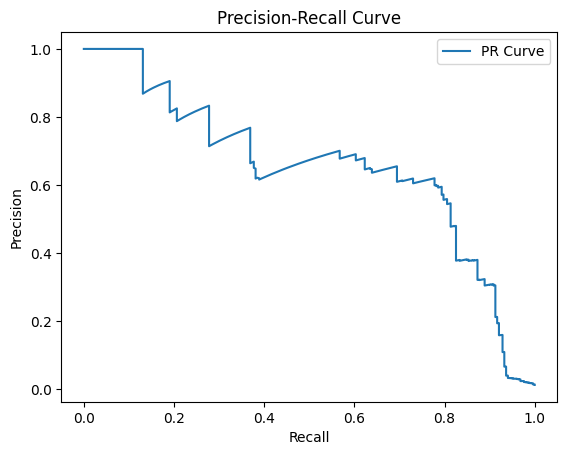

In [17]:
# 1. PR Curve
precision_vals, recall_vals, _ = precision_recall_curve(true_labels, predicted_probabilities)
plt.figure()
plt.plot(recall_vals, precision_vals, label='PR Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

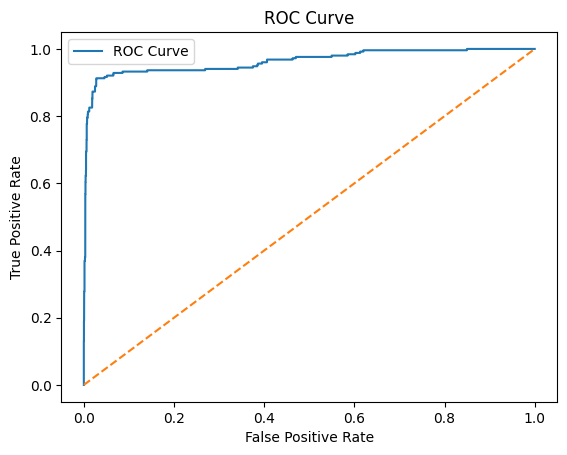

In [18]:
# 2. ROC Curve
fpr_vals, tpr_vals, _ = roc_curve(true_labels, predicted_probabilities)
plt.figure()
plt.plot(fpr_vals, tpr_vals, label='ROC Curve')
plt.plot([0, 1], [0, 1], linestyle='--')  # Diagonal line for reference
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.savefig('../images/our_roc_curve.png')
plt.show()

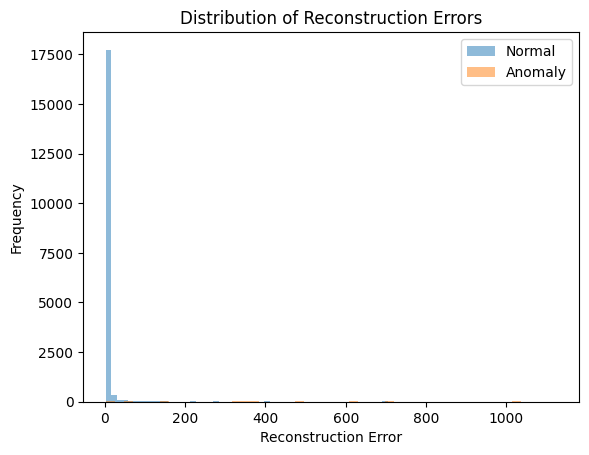

In [19]:
# 3. Distribution of Reconstruction Errors
plt.figure()
plt.hist(reconstruction_errors[true_labels == 0], bins=50, alpha=0.5, label='Normal')
plt.hist(reconstruction_errors[true_labels == 1], bins=50, alpha=0.5, label='Anomaly')
plt.xlabel('Reconstruction Error')
plt.ylabel('Frequency')
plt.title('Distribution of Reconstruction Errors')
plt.legend()
plt.show()

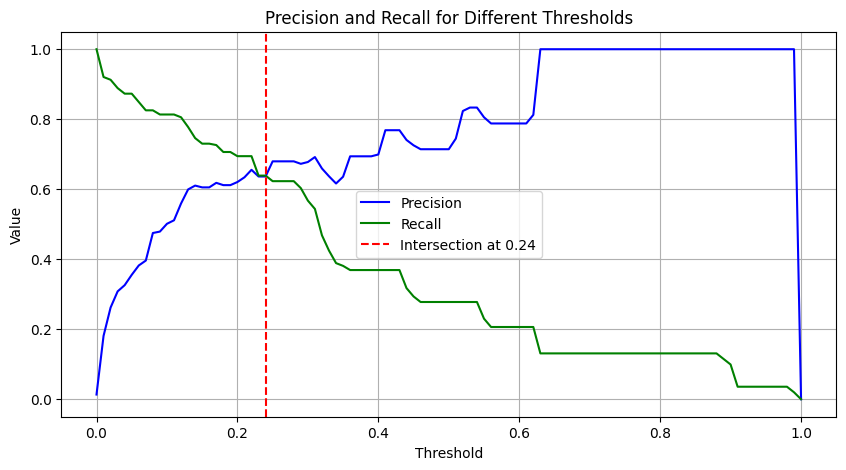

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score

# Assuming the other parts of your code, where you compute `predicted_probabilities` and `true_labels`, are above this

# List to store precision and recall values for each threshold
precisions = []
recalls = []

# Iterate over a range of thresholds (e.g., from 0 to 1 with a step of 0.01)
thresholds = np.arange(0, 1.01, 0.01)  # Adjust the range and step as needed

for threshold in thresholds:
    # Calculate predicted labels for this threshold
    predicted_labels_threshold = [1 if error > threshold else 0 for error in predicted_probabilities]
    
    # Avoiding a scenario where there's a perfect precision or recall which can cause "UndefinedMetricWarning"
    if len(np.unique(predicted_labels_threshold)) > 1:
        # Compute precision and recall
        precision = precision_score(true_labels, predicted_labels_threshold)
        recall = recall_score(true_labels, predicted_labels_threshold)
    else:
        precision, recall = 0, 0

    precisions.append(precision)
    recalls.append(recall)

# Find the threshold where precision and recall cross
diffs = np.array(precisions) - np.array(recalls)
cross_points = np.where(np.diff(np.sign(diffs)))[0]  # Where the difference changes sign

# Plot
plt.figure(figsize=(10,5))
plt.plot(thresholds, precisions, label='Precision', color='blue')
plt.plot(thresholds, recalls, label='Recall', color='green')

# If there's an intersection point, plot it
if len(cross_points) > 0:
    cross_threshold = thresholds[cross_points[0]]
    plt.axvline(x=cross_threshold, color='red', linestyle='--', label=f'Intersection at {cross_threshold:.2f}')

plt.xlabel('Threshold')
plt.ylabel('Value')
plt.title('Precision and Recall for Different Thresholds')
plt.legend()
plt.grid(True)
plt.savefig('../images/our_precision_recall_curve.png')
plt.show()


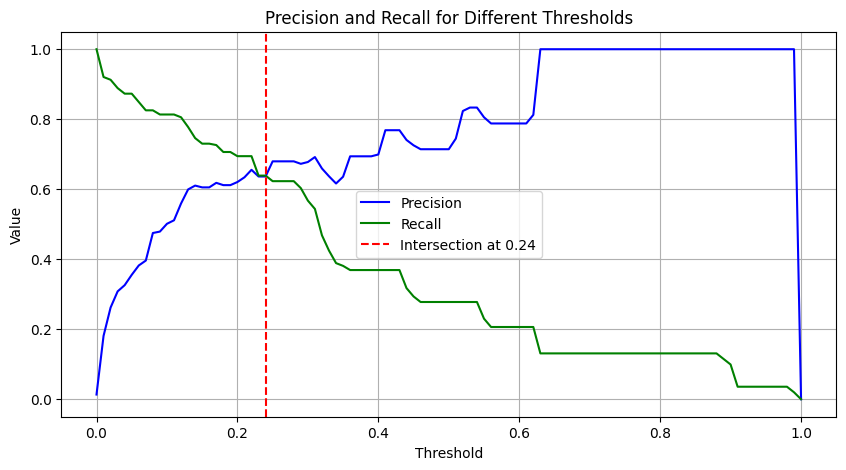

In [24]:
# precision-recall curve for different thresholds
from sklearn.metrics import precision_recall_curve

# Assuming the other parts of your code, where you compute `predicted_probabilities` and `true_labels`, are above this

# List to store precision and recall values for each threshold
precisions = []
recalls = []

# Iterate over a range of thresholds (e.g., from 0 to 1 with a step of 0.01)
thresholds = np.arange(0, 1.01, 0.01)  # Adjust the range and step as needed

for threshold in thresholds:
    # Calculate predicted labels for this threshold
    predicted_labels_threshold = [1 if error > threshold else 0 for error in predicted_probabilities]
    
    # Avoiding a scenario where there's a perfect precision or recall which can cause "UndefinedMetricWarning"
    if len(np.unique(predicted_labels_threshold)) > 1:
        # Compute precision and recall
        precision = precision_score(true_labels, predicted_labels_threshold)
        recall = recall_score(true_labels, predicted_labels_threshold)
    else:
        precision, recall = 0, 0

    precisions.append(precision)
    recalls.append(recall)

# Find the threshold where precision and recall cross
diffs = np.array(precisions) - np.array(recalls)
cross_points = np.where(np.diff(np.sign(diffs)))[0]  # Where the difference changes sign

# Plot
plt.figure(figsize=(10,5))
plt.plot(thresholds, precisions, label='Precision', color='blue')
plt.plot(thresholds, recalls, label='Recall', color='green')

# If there's an intersection point, plot it
if len(cross_points) > 0:
    cross_threshold = thresholds[cross_points[0]]
    plt.axvline(x=cross_threshold, color='red', linestyle='--', label=f'Intersection at {cross_threshold:.2f}')

plt.xlabel('Threshold')
plt.ylabel('Value')
plt.title('Precision and Recall for Different Thresholds')
plt.legend()
plt.grid(True)
# plt.savefig('../images/our_precision_recall_curve.png')
plt.show()

In [20]:
if len(cross_points) > 0:
    cross_threshold = thresholds[cross_points[0]]

    # Use the cross_threshold to convert predicted_probabilities into binary labels
    predicted_labels_cross_threshold = [1 if prob > cross_threshold else 0 for prob in predicted_probabilities]

    # Calculate metrics
    f1 = f1_score(true_labels, predicted_labels_cross_threshold)
    precision = precision_score(true_labels, predicted_labels_cross_threshold)
    recall = recall_score(true_labels, predicted_labels_cross_threshold)
    accuracy = accuracy_score(true_labels, predicted_labels_cross_threshold)
    roc_auc = roc_auc_score(true_labels, predicted_probabilities)

    # Calculate FPR
    tn, fp, fn, tp = confusion_matrix(true_labels, predicted_labels_cross_threshold).ravel()
    fpr = fp / (fp + tn)

    # Print out the metrics
    print(f'\nMetrics for threshold = {cross_threshold:.4f}')
    print(f'F1 Score: {f1:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'Accuracy: {accuracy:.4f}')
    print(f'ROC AUC: {roc_auc:.4f}')
    print(f'False Positive Rate (FPR): {fpr:.4f}')


Metrics for threshold = 0.2400
F1 Score: 0.6376
Precision: 0.6364
Recall: 0.6389
Accuracy: 0.9903
ROC AUC: 0.9633
False Positive Rate (FPR): 0.0049


In [27]:
# save the model
torch.save(model.state_dict(), '../models/autoencoder.pth')

In [28]:
# read the saved model
saved_model = Autoencoder()
saved_model.load_state_dict(torch.load('../models/autoencoder.pth'))

<All keys matched successfully>

In [29]:
# predict the test data
with torch.no_grad():
    reconstructed_test = saved_model(test_tensor).numpy()

In [30]:
# predict single row
single_row = test_tensor[0]
single_row = single_row.reshape(1, -1)
with torch.no_grad():
    reconstructed_single_row = saved_model(single_row).numpy()

In [31]:
reconstructed_single_row

array([[ 1.5955809e+01,  7.7757478e+00,  2.0229988e+03,  1.1724964e+00,
         3.2374973e+01,  1.1824340e+00,  1.1445229e+00,  2.1382694e+00,
         2.1528242e+00,  2.0692213e+00,  4.6931901e+00,  4.7048259e+00,
         4.3240108e+00, -8.9267772e-03,  2.4241319e+00,  3.0000687e+00,
         6.2878165e+00, -1.3885470e-02,  1.4711664e+00,  9.8592782e-01,
         2.1382601e+00,  2.1528161e+00,  2.0692475e+00,  4.6931725e+00,
         4.7048340e+00,  4.3240056e+00,  1.4298896e+00,  1.4322352e+00,
         1.3866593e+00, -2.4052295e-03, -2.3492128e-02, -5.4313862e-03,
        -1.4721715e-02, -1.9258283e-02, -8.3835570e-05, -1.9028048e-03,
        -5.0022076e-03, -4.2174361e-04, -2.2680694e-03, -1.8009556e-02]],
      dtype=float32)

In [ ]:
# predict label for single row using reconstructed_single_row and threshold which we found above
reconstruction_error = np.mean(np.power(single_row - reconstructed_single_row, 2), axis=1)
predicted_label = 1 if reconstruction_error > cross_threshold else 0

In [25]:
train_tensor = torch.tensor(normal_train_data.values, dtype=torch.float32)

In [36]:
reconstructed_train.shape

(55438, 40)

In [37]:
train_tensor.shape

torch.Size([55438, 40])

In [38]:
# calculate the max reconstruction for train data
with torch.no_grad():
    reconstructed_train = saved_model(train_tensor).numpy()

reconstruction_errors = np.mean(np.power(train_tensor.numpy() - reconstructed_train, 2), axis=1)
max_reconstruction_error = np.max(reconstruction_errors)
print(max_reconstruction_error)

987.0692


## Different thresholds detection method (with histogram)

In [22]:
# calculate test mse on negative labels
normal_test_data = test_data[test_labels == 0]  # Assuming 0 means normal
normal_test_tensor = torch.tensor(normal_test_data.values, dtype=torch.float32)
with torch.no_grad():
    reconstructed_normal_test = model(normal_test_tensor).numpy()
normal_reconstruction_errors = np.mean(np.power(normal_test_data - reconstructed_normal_test, 2), axis=1)
# to dataframe
normal_reconstruction_errors = pd.DataFrame(normal_reconstruction_errors, columns=['reconstruction_error'])

In [23]:
normal_reconstruction_errors.describe()

,reconstruction_error
count,18609.000
mean,9.536
std,35.950
min,1.853
25%,3.793
50%,4.763
75%,6.363
max,709.006


In [24]:
# calculate mse between test data and reconstructed test data
test_reconstruction_errors = np.mean(np.power(test_data - reconstructed_test, 2), axis=1)
# to dataframe
test_reconstruction_errors = pd.DataFrame(test_reconstruction_errors)
test_reconstruction_errors.describe()

,0
count,18861.000
mean,14.966
std,69.136
min,1.853
25%,3.801
50%,4.817
75%,6.405
max,1129.760


In [25]:
# rules of thumb to identify the number of bins Freedman-Diaconis rule
q1 = normal_reconstruction_errors.quantile(0.25)[0]
q3 = normal_reconstruction_errors.quantile(0.75)[0]
iqr = q3 - q1
bin_width = 2 * iqr / len(normal_reconstruction_errors) ** (1 / 3)
bin_count = int(np.ceil( (normal_reconstruction_errors.max()[0] - normal_reconstruction_errors.min()[0]) / bin_width))

Text(0.5, 1.0, 'bins - 3647')

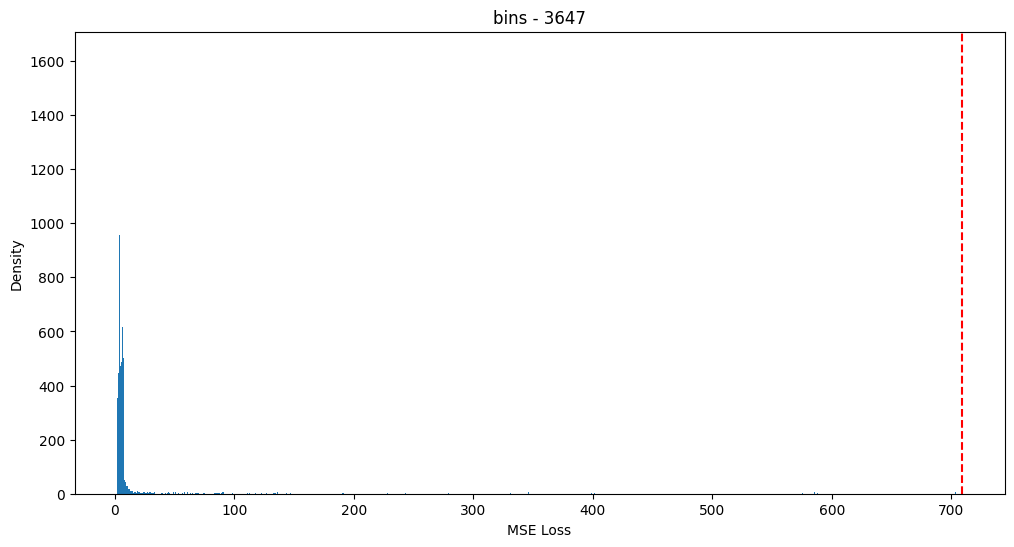

In [26]:
fig = plt.figure(figsize=(12, 6))
plt.hist(normal_reconstruction_errors, bins=bin_count)
plt.axvline(x=normal_reconstruction_errors.max()[0], color='red', linestyle='--', label=f'Normal Threshold at {normal_reconstruction_errors.max()[0]:.2f}')
plt.xlabel("MSE Loss")
plt.ylabel("Density")
plt.title(f'bins - {bin_count}')

## Use Particel Swarm Optimization

In [27]:
class Particle:
    def __init__(self, model):
        self.model = model
        self.position = [param.clone() for param in model.parameters()]
        self.velocity = [torch.zeros_like(param) for param in model.parameters()]
        self.best_position = list(self.position)
        self.best_score = float('inf')  # Minimizing loss

def train_with_pso(model, dataloader, num_particles, num_iterations):
    swarm = [Particle(model) for _ in range(num_particles)]
    g_best_position = None
    g_best_score = float('inf')

    for iteration in range(num_iterations):
        for particle in swarm:
            # Set model params to particle's position
            for param, p_position in zip(model.parameters(), particle.position):
                param.data = p_position.data.clone()

            # Calculate loss
            total_loss = 0.0
            for inputs, targets in dataloader:
                outputs = model(inputs)
                loss = criterion(outputs, targets)
                total_loss += loss.item()

            # Update personal best
            if total_loss < particle.best_score:
                particle.best_score = total_loss
                particle.best_position = list(particle.position)

            # Update global best
            if total_loss < g_best_score:
                g_best_score = total_loss
                g_best_position = list(particle.position)

        # Update particle positions and velocities based on personal and global bests
        for particle in swarm:
            for velocity, position, p_best, g_best in zip(particle.velocity, particle.position, particle.best_position, g_best_position):
                # This is a very basic PSO update rule. There are many variations and enhancements.
                inertia = torch.rand_like(velocity)
                personal_attraction = torch.rand_like(velocity) * (p_best - position)
                global_attraction = torch.rand_like(velocity) * (g_best - position)
                
                # Update velocity
                velocity.data = inertia * velocity + personal_attraction + global_attraction
                
                # Update position
                position.data += velocity

    # Set the model's parameters to the global best
    for param, g_best in zip(model.parameters(), g_best_position):
        param.data = g_best.data.clone()


In [28]:
# Initialize PSO parameters
num_particles = 30  # This is an arbitrary choice; you may need to adjust based on your problem
num_iterations = num_epochs  # We'll treat each PSO iteration as an epoch
swarm = [Particle(model) for _ in range(num_particles)]
g_best_position = None
g_best_score = float('inf')

for iteration in range(num_iterations):
    
    for particle in swarm:
        # Set model params to particle's position
        for param, p_position in zip(model.parameters(), particle.position):
            param.data = p_position.data.clone()

        # Compute loss over the entire training set
        total_loss = 0.0
        for batch in train_dataloader:
            inputs = batch[0]
            outputs = model(inputs)
            loss = criterion(outputs, inputs)
            total_loss += loss.item()

        # Update personal best
        if total_loss < particle.best_score:
            particle.best_score = total_loss
            particle.best_position = list(particle.position)

        # Update global best
        if total_loss < g_best_score:
            g_best_score = total_loss
            g_best_position = list(particle.position)

    # Update particle positions and velocities based on personal and global bests
    for particle in swarm:
        for velocity, position, p_best, g_best in zip(particle.velocity, particle.position, particle.best_position, g_best_position):
            inertia = torch.rand_like(velocity)
            personal_attraction = torch.rand_like(velocity) * (p_best - position)
            global_attraction = torch.rand_like(velocity) * (g_best - position)
            
            # Update velocity
            velocity.data = inertia * velocity + personal_attraction + global_attraction
            
            # Update position
            position.data += velocity

    # Early stopping check
    if g_best_score + 1e-5 < best_loss:
        best_loss = g_best_score
        epochs_without_improvement = 0
    else:
        epochs_without_improvement += 1

    if epochs_without_improvement == patience:
        print("Early stopping due to no improvement in loss.")
        break

    # Print current iteration's results
    print(f"Iteration [{iteration + 1}/{num_iterations}], Loss: {g_best_score:.4f}")

# Set the model's parameters to the global best after PSO ends
for param, g_best in zip(model.parameters(), g_best_position):
    param.data = g_best.data.clone()


Iteration [1/100], Loss: 2383.0624
Iteration [2/100], Loss: 2383.0624
Iteration [3/100], Loss: 2383.0624
Iteration [4/100], Loss: 2383.0624
Iteration [5/100], Loss: 2383.0624
Iteration [6/100], Loss: 2383.0470
Iteration [7/100], Loss: 2383.0470
Iteration [8/100], Loss: 2383.0470
Iteration [9/100], Loss: 2383.0470
Iteration [10/100], Loss: 2383.0470
Iteration [11/100], Loss: 2383.0470
Iteration [12/100], Loss: 2383.0470


KeyboardInterrupt: 

- FInd a paper about streaming with kafka, python
- Create synthetic data with GANs from the real world data from company
- Compare the performance of the model on the real data vs. the synthetic data